# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [2]:
import os
import tarfile
import urllib

In [3]:
import pandas as pd
 
movies = pd.read_csv("movies.csv") 

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
Title                     3201 non-null object
US Gross                  3201 non-null object
Worldwide Gross           3201 non-null object
US DVD Sales              564 non-null float64
Production Budget         3200 non-null float64
Release Date              3201 non-null object
MPAA Rating               2596 non-null object
Running Time (min)        1209 non-null float64
Distributor               2969 non-null object
Source                    2836 non-null object
Major Genre               2926 non-null object
Creative Type             2755 non-null object
Director                  1870 non-null object
Rotten Tomatoes Rating    2321 non-null float64
IMDB Rating               2988 non-null float64
IMDB Votes                2988 non-null float64
dtypes: float64(6), object(10)
memory usage: 400.2+ KB


In [5]:
movies["US Gross"].value_counts()

0            66
8000000       9
Unknown       7
2000000       7
7000000       7
             ..
41410568      1
285630280     1
305070        1
135041968     1
12232628      1
Name: US Gross, Length: 3061, dtype: int64

In [6]:
movies["Worldwide Gross"].value_counts()

0           47
8000000      9
7000000      8
Unknown      7
11000000     6
            ..
81972846     1
773490       1
98983590     1
33451479     1
12232628     1
Name: Worldwide Gross, Length: 3075, dtype: int64

I am removing the unknown for the data, US Gross and Worldwide Gross
The unknown became 0

In [7]:
#movies = movies.replace(to_replace = ['Unknown'], value = ['0']) 
movies = movies.replace('Unknown','0') 

I checked to see if a changed occured

In [8]:
movies["US Gross"].value_counts()

0            73
8000000       9
2000000       7
7000000       7
4000000       5
             ..
42885593      1
41410568      1
285630280     1
305070        1
12232628      1
Name: US Gross, Length: 3060, dtype: int64

In [9]:
movies["Worldwide Gross"].value_counts()

0           54
8000000      9
7000000      8
11000000     6
2000000      6
            ..
81972846     1
773490       1
98983590     1
33451479     1
12232628     1
Name: Worldwide Gross, Length: 3074, dtype: int64

In [10]:
movies['US Gross'] = movies['US Gross'].astype(float)
movies['Worldwide Gross'] = movies['Worldwide Gross'].astype(float)

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
Title                     3201 non-null object
US Gross                  3201 non-null float64
Worldwide Gross           3201 non-null float64
US DVD Sales              564 non-null float64
Production Budget         3200 non-null float64
Release Date              3201 non-null object
MPAA Rating               2596 non-null object
Running Time (min)        1209 non-null float64
Distributor               2969 non-null object
Source                    2836 non-null object
Major Genre               2926 non-null object
Creative Type             2755 non-null object
Director                  1870 non-null object
Rotten Tomatoes Rating    2321 non-null float64
IMDB Rating               2988 non-null float64
IMDB Votes                2988 non-null float64
dtypes: float64(8), object(8)
memory usage: 400.2+ KB


In [11]:
movies.isnull().sum()

Title                        0
US Gross                     0
Worldwide Gross              0
US DVD Sales              2637
Production Budget            1
Release Date                 0
MPAA Rating                605
Running Time (min)        1992
Distributor                232
Source                     365
Major Genre                275
Creative Type              446
Director                  1331
Rotten Tomatoes Rating     880
IMDB Rating                213
IMDB Votes                 213
dtype: int64

# I am taking out US DVD Sales because more than 80% of the data is not present

In [12]:
movies = movies.drop("US DVD Sales", axis=1)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 15 columns):
Title                     3201 non-null object
US Gross                  3201 non-null float64
Worldwide Gross           3201 non-null float64
Production Budget         3200 non-null float64
Release Date              3201 non-null object
MPAA Rating               2596 non-null object
Running Time (min)        1209 non-null float64
Distributor               2969 non-null object
Source                    2836 non-null object
Major Genre               2926 non-null object
Creative Type             2755 non-null object
Director                  1870 non-null object
Rotten Tomatoes Rating    2321 non-null float64
IMDB Rating               2988 non-null float64
IMDB Votes                2988 non-null float64
dtypes: float64(7), object(8)
memory usage: 375.2+ KB


# Fill in na values with the median

In [13]:
movies.fillna(movies.median(), inplace=True)

In [14]:
movies.isnull().sum()

Title                        0
US Gross                     0
Worldwide Gross              0
Production Budget            0
Release Date                 0
MPAA Rating                605
Running Time (min)           0
Distributor                232
Source                     365
Major Genre                275
Creative Type              446
Director                  1331
Rotten Tomatoes Rating       0
IMDB Rating                  0
IMDB Votes                   0
dtype: int64

# I dropped the na values for caterogical data becsue I couldn't make the categorical data into numbers with na values.
I could not think of a better solution

In [15]:
movies = movies.dropna()
movies.isnull().sum()

Title                     0
US Gross                  0
Worldwide Gross           0
Production Budget         0
Release Date              0
MPAA Rating               0
Running Time (min)        0
Distributor               0
Source                    0
Major Genre               0
Creative Type             0
Director                  0
Rotten Tomatoes Rating    0
IMDB Rating               0
IMDB Votes                0
dtype: int64

In [16]:
movies.head()

,Title,US Gross,Worldwide Gross,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
4,Disaster Movie,14190901.0,34690901.0,20000000.0,29-Aug-08,PG-13,88.0,Lionsgate,Original Screenplay,Comedy,Contemporary Fiction,Jason Friedberg,2.0,1.7,34928.0
5,Glitter,4273372.0,4273372.0,8500000.0,21-Sep-01,PG-13,107.0,20th Century Fox,Original Screenplay,Musical,Contemporary Fiction,Vondie Curtis-Hall,7.0,2.0,13778.0
12,Epic Movie,39739367.0,86858578.0,20000000.0,26-Jan-07,PG-13,86.0,20th Century Fox,Original Screenplay,Comedy,Contemporary Fiction,Jason Friedberg,2.0,2.2,48975.0
15,Alone in the Dark,5178569.0,8178569.0,20000000.0,28-Jan-05,R,96.0,Lionsgate,Based on Game,Horror,Fantasy,Uwe Boll,1.0,2.3,26028.0
19,Gigli,6087542.0,7266209.0,54000000.0,1-Aug-03,R,107.0,Sony Pictures,Original Screenplay,Romantic Comedy,Contemporary Fiction,Martin Brest,6.0,2.4,29031.0


In [17]:
movies["Distributor"].value_counts()

Warner Bros.            183
Sony Pictures           180
Paramount Pictures      148
Universal               148
Walt Disney Pictures    130
                       ... 
Apparition                1
Testimony Pictures        1
IDP Distribution          1
Screen Media Films        1
Romar                     1
Name: Distributor, Length: 63, dtype: int64

In [18]:
movies.describe()

,US Gross,Worldwide Gross,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
count,1.455000e+03,1.455000e+03,1.455000e+03,1455.000000,1455.000000,1455.000000,1455.000000
mean,6.686154e+07,1.380933e+08,4.762624e+07,111.178007,55.490722,6.450722,43651.052234
std,7.730612e+07,1.936889e+08,4.146628e+07,16.240729,24.036933,1.131905,54265.900876
min,0.000000e+00,0.000000e+00,1.500000e+04,74.000000,1.000000,1.700000,33.000000
25%,1.598509e+07,2.413825e+07,1.900000e+07,107.000000,40.000000,5.800000,12624.000000
50%,4.080300e+07,6.942597e+07,3.600000e+07,107.000000,55.000000,6.500000,24090.000000
75%,8.867471e+07,1.764937e+08,6.500000e+07,115.000000,75.000000,7.200000,55692.000000
max,7.601676e+08,2.767891e+09,3.000000e+08,222.000000,100.000000,9.200000,519541.000000


Saving figure attribute_histogram_plots


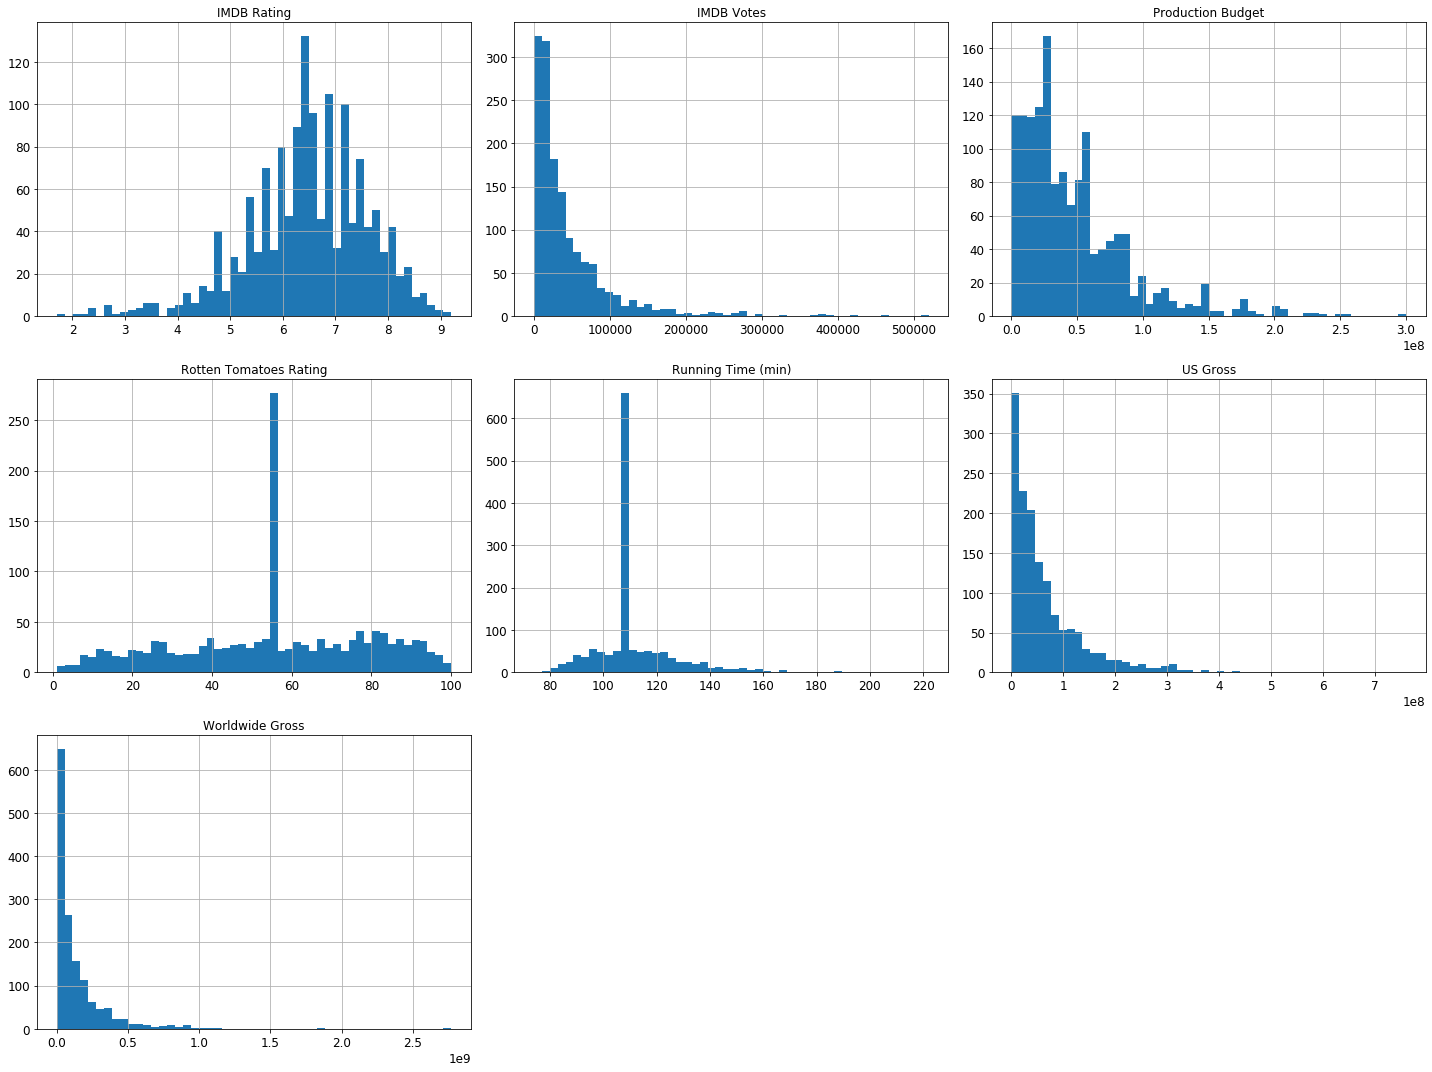

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
movies.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [20]:
!pip install seaborn

In [21]:
import seaborn as sns

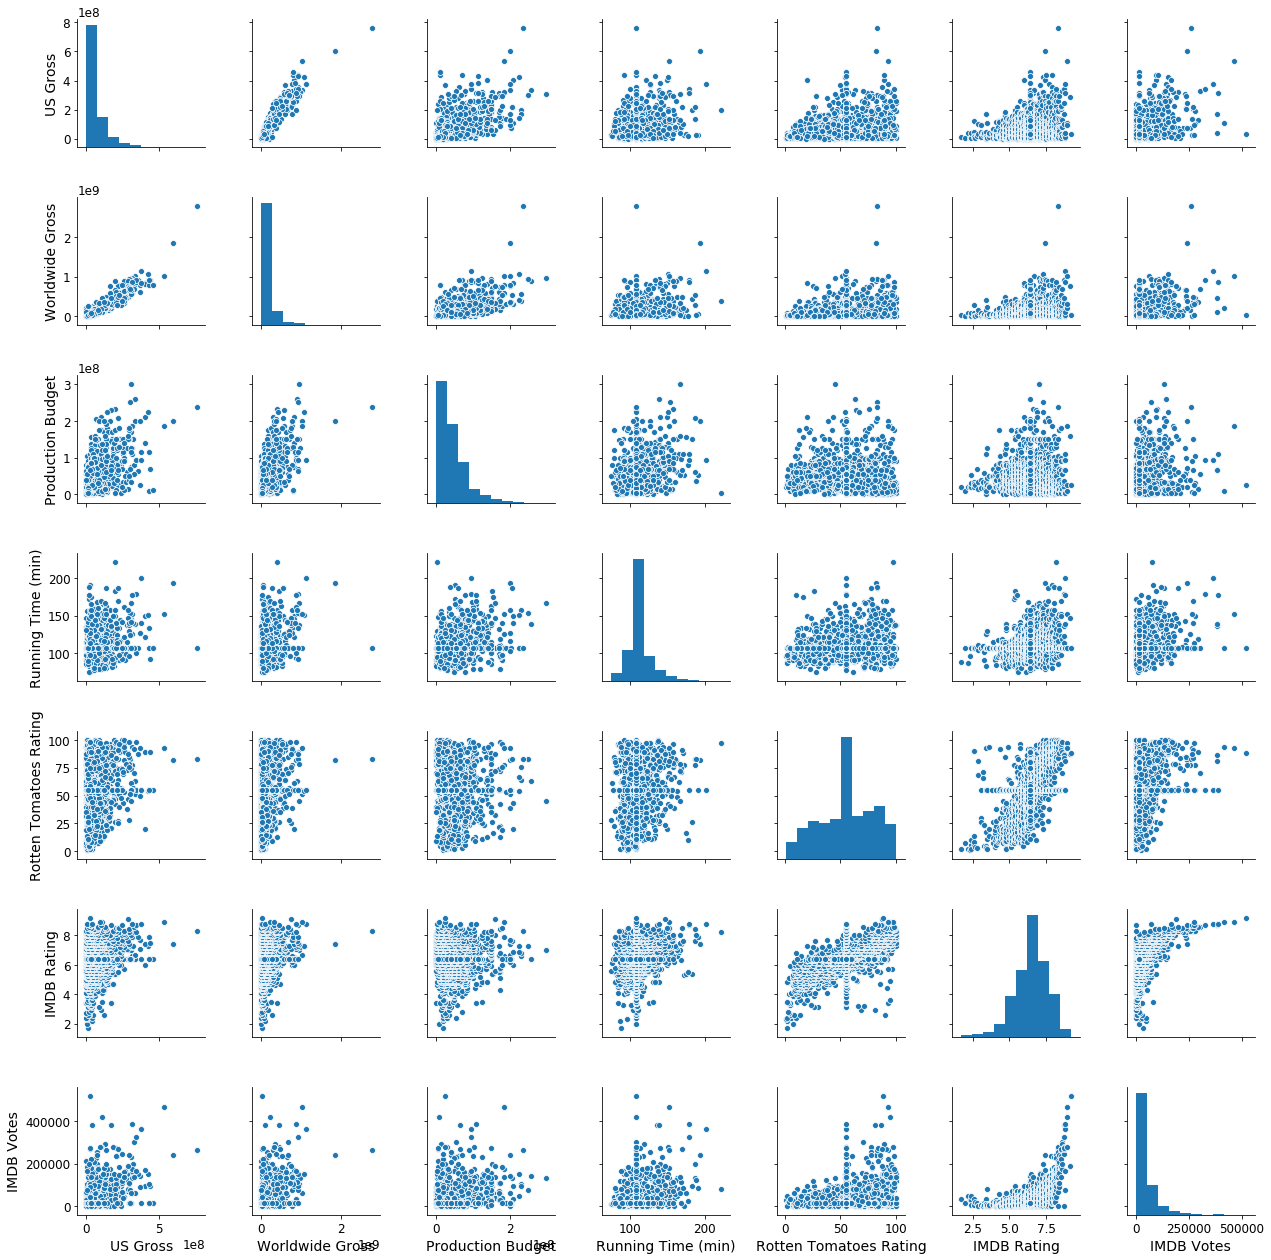

In [22]:
sns.pairplot(movies)

In [23]:
movies.describe()

,US Gross,Worldwide Gross,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
count,1.455000e+03,1.455000e+03,1.455000e+03,1455.000000,1455.000000,1455.000000,1455.000000
mean,6.686154e+07,1.380933e+08,4.762624e+07,111.178007,55.490722,6.450722,43651.052234
std,7.730612e+07,1.936889e+08,4.146628e+07,16.240729,24.036933,1.131905,54265.900876
min,0.000000e+00,0.000000e+00,1.500000e+04,74.000000,1.000000,1.700000,33.000000
25%,1.598509e+07,2.413825e+07,1.900000e+07,107.000000,40.000000,5.800000,12624.000000
50%,4.080300e+07,6.942597e+07,3.600000e+07,107.000000,55.000000,6.500000,24090.000000
75%,8.867471e+07,1.764937e+08,6.500000e+07,115.000000,75.000000,7.200000,55692.000000
max,7.601676e+08,2.767891e+09,3.000000e+08,222.000000,100.000000,9.200000,519541.000000


# High-Level Question: What factors drive the box office success of motion pictures?

For US Gross, there is high correlation between Worldwide Gross, Production Budget, and IMDB Votes. 
This means that a high Production Budget, and IMDB Votes correlate with high US Gross. 
It is expected that high US Gross would have a high correlation with Worldwide Gross because some movies in the dataset had the same values for US and Worldwide Gross and US Gross is included into Worldwide Gross.

For US Gross, there is weak correlation for Running Time (min), IMDB Rating, and Rotten Tomatoes Rating.

For Worldwide Gross, there were silimar reaults in correlation as the US Gross.

In [24]:
corr_matrix = movies.corr()
corr_matrix["US Gross"].sort_values(ascending=False)

US Gross                  1.000000
Worldwide Gross           0.942002
Production Budget         0.593212
IMDB Votes                0.493265
Running Time (min)        0.236706
IMDB Rating               0.198830
Rotten Tomatoes Rating    0.178776
Name: US Gross, dtype: float64

In [25]:
corr_matrix["Worldwide Gross"].sort_values(ascending=False)

Worldwide Gross           1.000000
US Gross                  0.942002
Production Budget         0.641329
IMDB Votes                0.505670
Running Time (min)        0.278357
IMDB Rating               0.213987
Rotten Tomatoes Rating    0.173229
Name: Worldwide Gross, dtype: float64

In order to visualize the data to gain insight, I have graphed them using scatterplots.

# How do films fare in the U.S. vs. worldwide markets?

In [26]:
sns.set_palette("coolwarm")

As you can see, there is a strong positive correlation between US Gross and Worldwide Gross. If you look at the mean values for US Gross and Worldwide Gross, you will see that films typically gross more Worldwide than US.

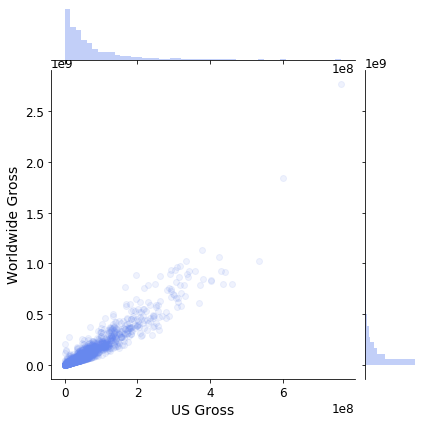

In [27]:
sns.jointplot(x='US Gross', y='Worldwide Gross', data=movies, alpha=0.1)

As you can see, there is a positive correlation between US Gross and IMDB Votes but is harder to see that the correlation in strong.

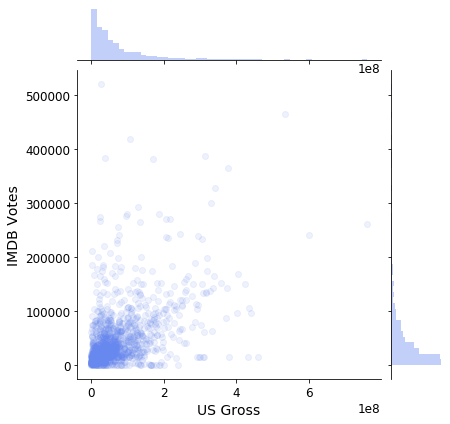

In [28]:
sns.jointplot(x='US Gross', y='IMDB Votes', data=movies, alpha=0.1)

As you can see, there is a positive correlation between Worldwide Gross and Production Budget but is harder to see that the correlation in strong.

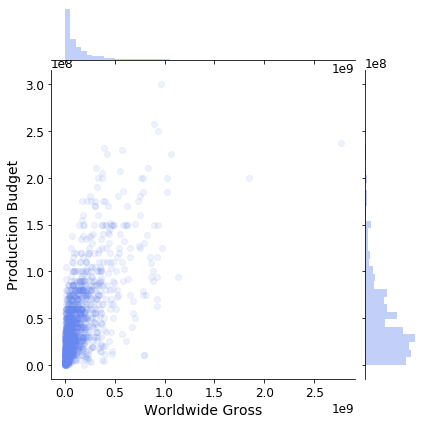

In [29]:
sns.jointplot(x='Worldwide Gross', y='Production Budget', data=movies, alpha=0.1)

As you can see, there is a positive correlation between Worldwide Gross and IMDB Votes but is harder to see that the correlation in strong.

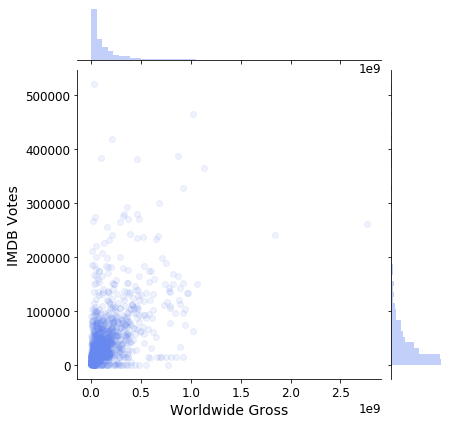

In [30]:
sns.jointplot(x='Worldwide Gross', y='IMDB Votes', data=movies, alpha=0.1)

# How do fan favorites and critical darlings relate to ticket sales?

Feature engeering to detemine ticket sales
Gross = tickets/prodution budget. So, to create a tickets sold variable, I must take the  production budget times the gross.

I detecided to calculate ticket sales for US and Worldwide Gross.

In [31]:
movies["US tickets"] = movies["US Gross"]*movies["Production Budget"]
movies["Worldwide tickets"] = movies["Worldwide Gross"]*movies["Production Budget"]

For Rotten Tomatoes Rating, there is high correlation between IMDB Rating. For Rotten Tomatoes Rating, there is a weak correlation between US and Worldwide tickets. This means that US and Worldwide tickets has a weak affect on a film's Rotten Tomatoes Rating.

In [32]:
corr_matrix = movies.corr()
corr_matrix["Rotten Tomatoes Rating"].sort_values(ascending=False)

Rotten Tomatoes Rating    1.000000
IMDB Rating               0.670495
IMDB Votes                0.346546
US Gross                  0.178776
Worldwide Gross           0.173229
Running Time (min)        0.156800
US tickets                0.115506
Worldwide tickets         0.104003
Production Budget        -0.053957
Name: Rotten Tomatoes Rating, dtype: float64

For IMDB Rating, there is high correlation between Rotten Tomatoes Rating. For IMDB Rating, there is a weak correlation between US and Worldwide tickets. This means that US and Worldwide tickets have a weak affect on a film's IMDB Rating.

In [33]:
corr_matrix["IMDB Rating"].sort_values(ascending=False)

IMDB Rating               1.000000
Rotten Tomatoes Rating    0.670495
IMDB Votes                0.555210
Running Time (min)        0.254724
Worldwide Gross           0.213987
US Gross                  0.198830
US tickets                0.151080
Worldwide tickets         0.145758
Production Budget         0.009896
Name: IMDB Rating, dtype: float64

Overall, there is a weak positive relationship between fan favorites and critical darlings to ticket sales.

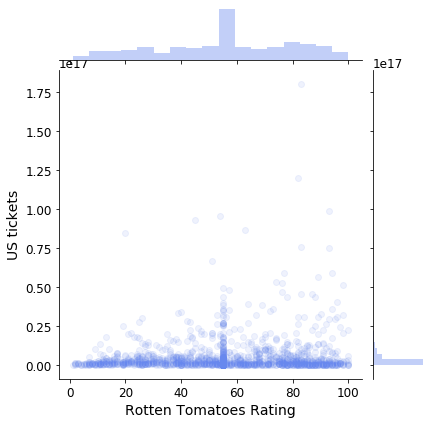

In [34]:
sns.jointplot(x='Rotten Tomatoes Rating', y='US tickets', data=movies, alpha=0.1)

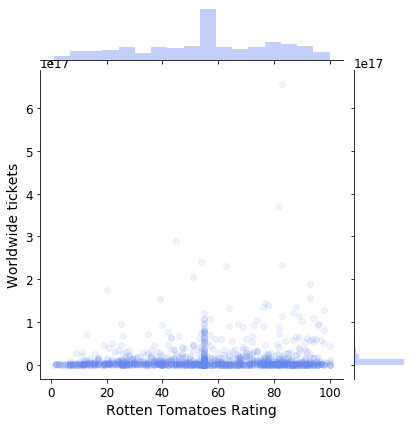

In [35]:
sns.jointplot(x='Rotten Tomatoes Rating', y='Worldwide tickets', data=movies, alpha=0.1)

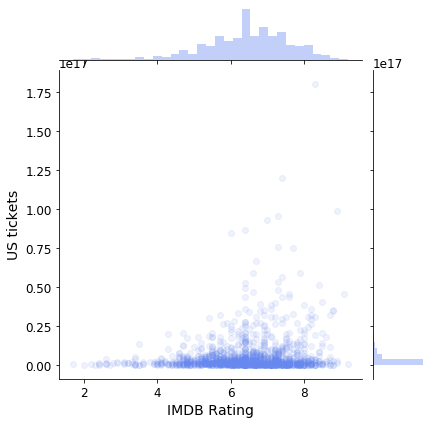

In [36]:
sns.jointplot(x='IMDB Rating', y='US tickets', data=movies, alpha=0.1)

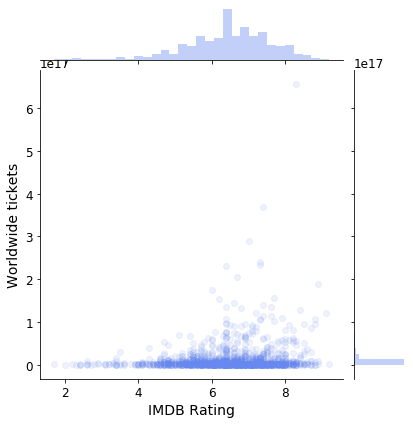

In [37]:
sns.jointplot(x='IMDB Rating', y='Worldwide tickets', data=movies, alpha=0.1)

# Do producers strategize release dates for certain kinds of films?

I attempted to add categorical input features, Major Genre and Release Date:

I looked at Major Genre first.

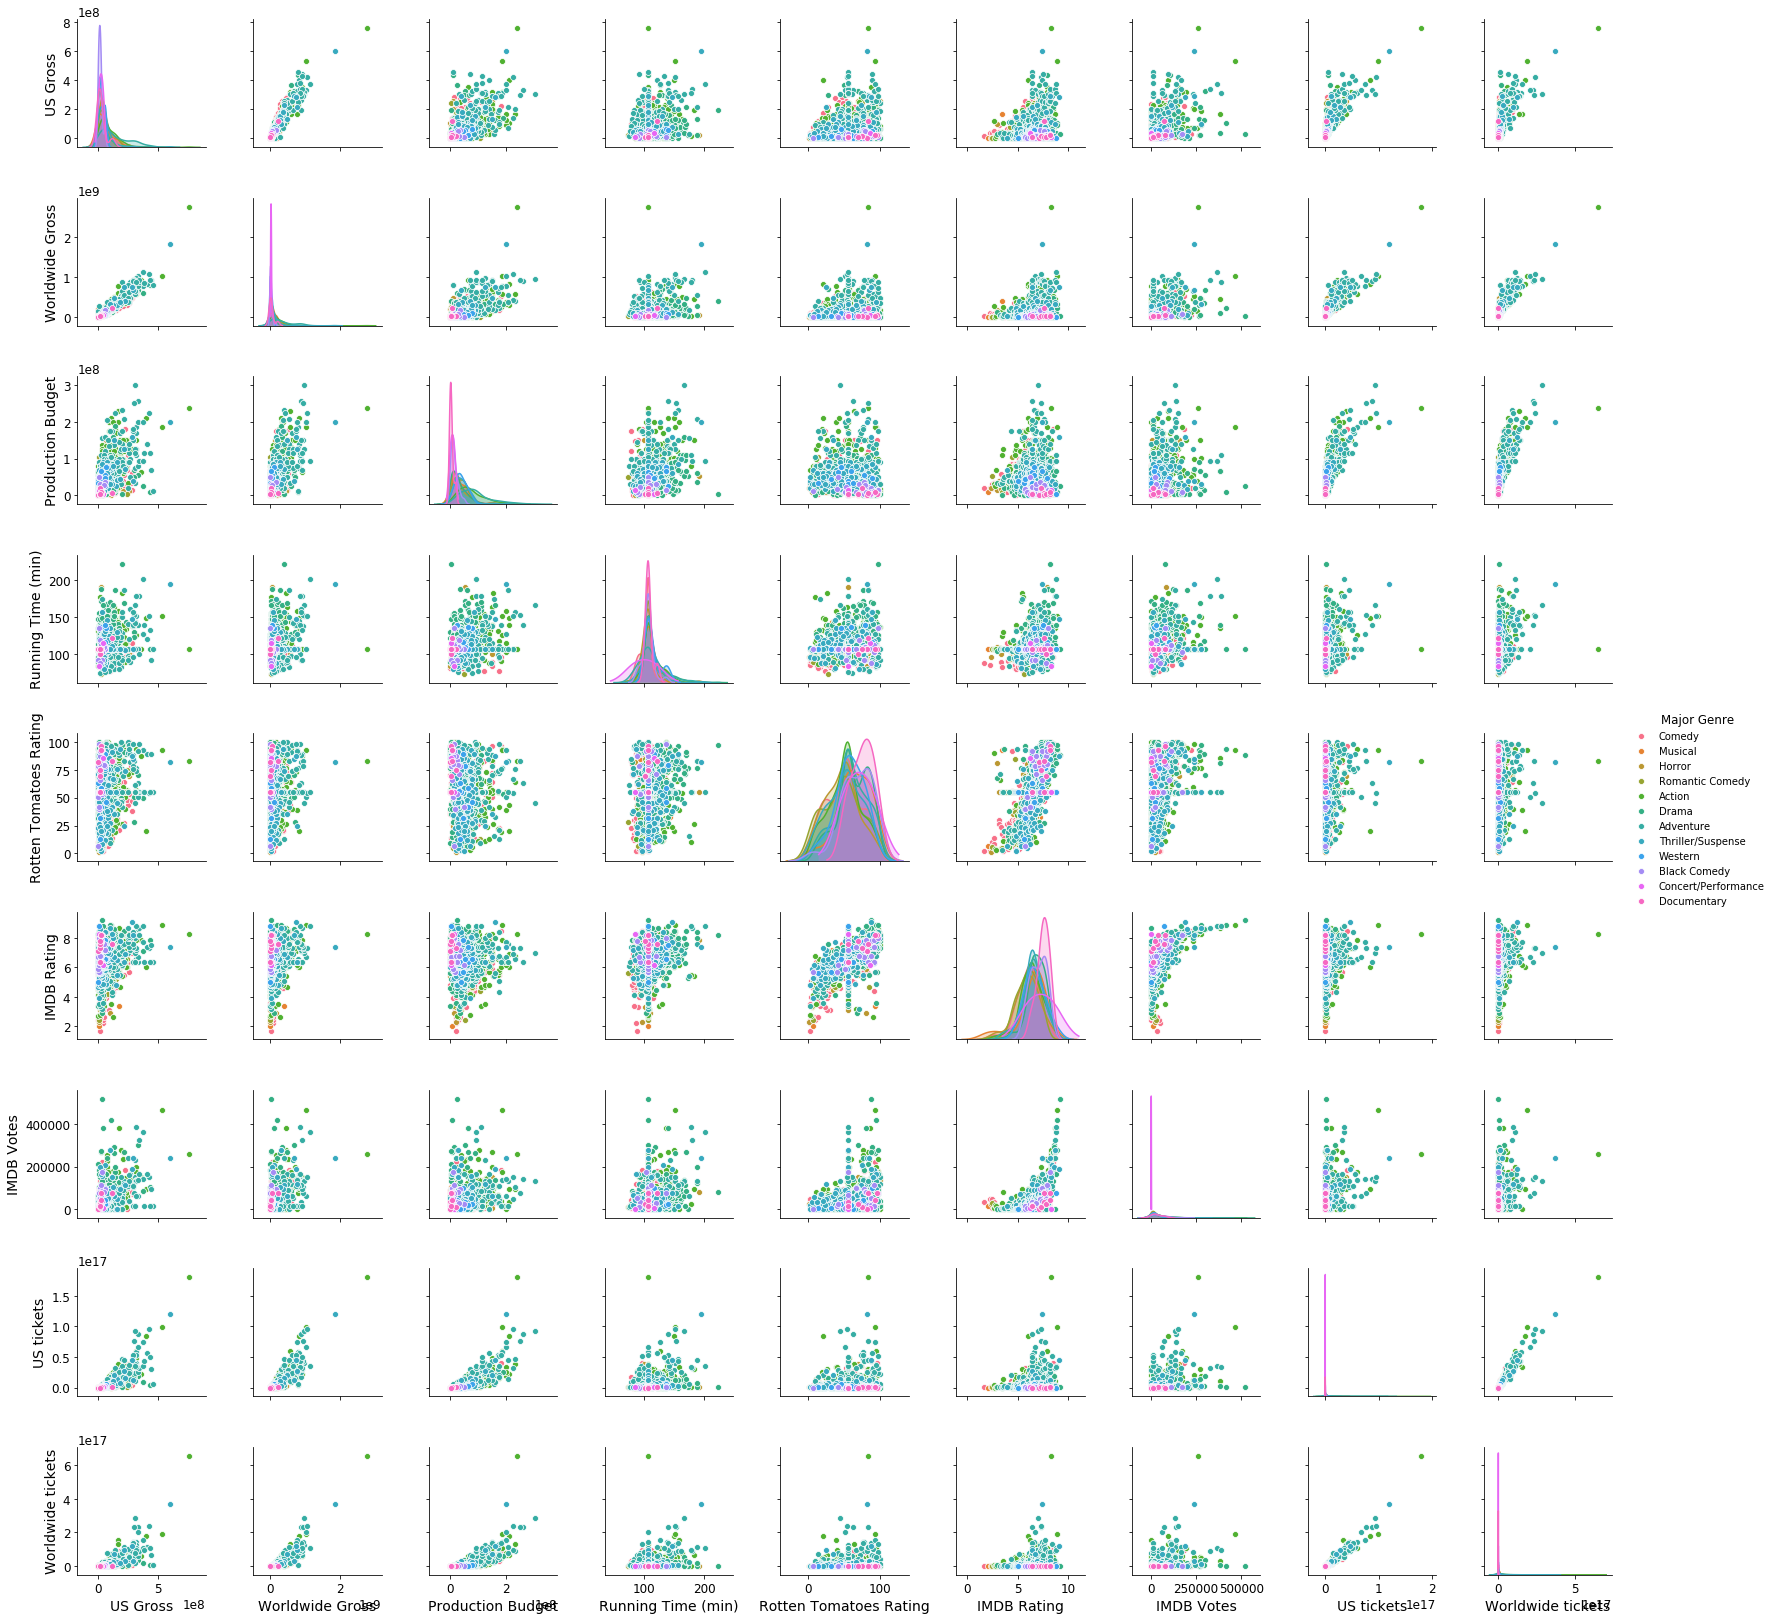

In [38]:
sns.pairplot(movies, hue = 'Major Genre')

In [39]:
movies["Major Genre"].value_counts()

Drama                  404
Comedy                 322
Action                 234
Adventure              153
Thriller/Suspense      133
Horror                  72
Romantic Comedy         72
Black Comedy            23
Musical                 17
Western                 15
Documentary              8
Concert/Performance      2
Name: Major Genre, dtype: int64

In [40]:
Genre_cat = movies[["Major Genre"]]
Genre_cat.head(10)

,Major Genre
4,Comedy
5,Musical
12,Comedy
15,Horror
19,Romantic Comedy
20,Comedy
21,Comedy
29,Action
30,Comedy
31,Comedy


In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
Genre_cat_encoded = ordinal_encoder.fit_transform(Genre_cat)
Genre_cat_encoded[:10]

array([[3.],
       [8.],
       [3.],
       [7.],
       [9.],
       [3.],
       [3.],
       [0.],
       [3.],
       [3.]])

In [42]:
ordinal_encoder.categories_

[array(['Action', 'Adventure', 'Black Comedy', 'Comedy',
        'Concert/Performance', 'Documentary', 'Drama', 'Horror', 'Musical',
        'Romantic Comedy', 'Thriller/Suspense', 'Western'], dtype=object)]

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
Genre_cat_1hot = cat_encoder.fit_transform(Genre_cat)
Genre_cat_1hot

<1455x12 sparse matrix of type '<class 'numpy.float64'>'
	with 1455 stored elements in Compressed Sparse Row format>

In [44]:
Genre_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# After thing step I was unsure how calculate correlation coefficient for the array. So stopped there and explored major genre in relation to the other original varaibles.

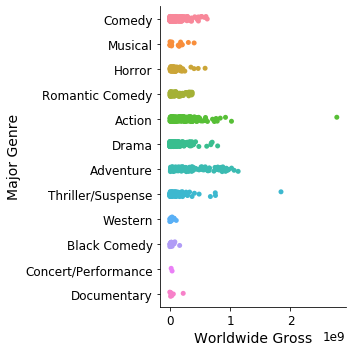

In [45]:
sns.catplot(x="Worldwide Gross", y="Major Genre", data=movies)

# I decided to go with box plots to understand the data better.

Adventure films had the highest median Worldwide Gross. This is interesting becasue I would expect Drama films the highest median Worldwide Gross to due there being more movies in that genre. Action and Thriller/Suspense films both had outliters. Concert/Performance had the lowest median Worldwide Gross which makes sense there are few film in this genre.

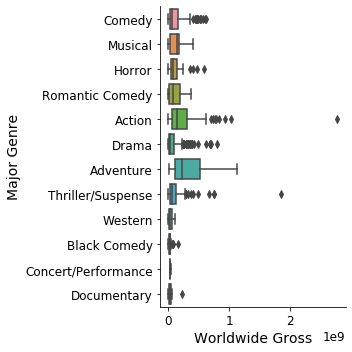

In [46]:
sns.catplot(x="Worldwide Gross", y="Major Genre", kind="box", data=movies)

Adventure films had the highest median US Gross. There were many outliters. Concert/Performance, Black Comedy, and Black Comedy had the lowest median US Gross.

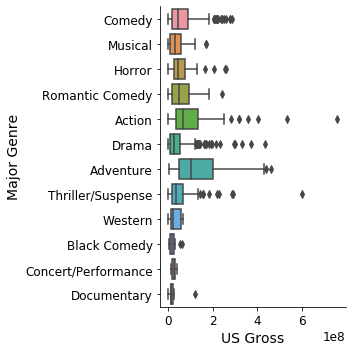

In [47]:
sns.catplot(x="US Gross", y="Major Genre", kind="box", data=movies)

Adventure films had the highest median Production Budget. There were many outliters. Documentary films had the lowest median Production Budget.

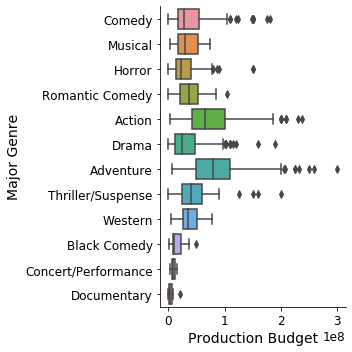

In [48]:
sns.catplot(x="Production Budget", y="Major Genre", kind="box", data=movies)

This graph is hard to interpert. A drama film has the longest Running Time (min). It was hard to determine medians between the genres.

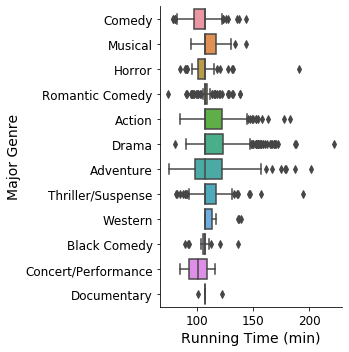

In [49]:
sns.catplot(x="Running Time (min)", y="Major Genre", kind="box", data=movies)

Documentary films had the highest median Rotten Tomatoes Rating. This is interesting because, Documentary films had the lowest median Production Budget. Adventure, Thriller/Suspense, and Western films had the lowest median Rotten Tomatoes Ratings.

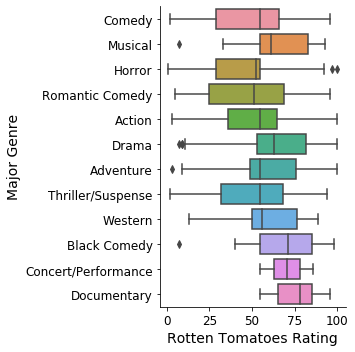

In [50]:
sns.catplot(x="Rotten Tomatoes Rating", y="Major Genre", kind="box", data=movies)

Documentary films had the highest median IMDB Rating. Since there is a strong positive correltion betwenn IMDB Ratings and Rotten Tomatoes Ratings, it makes sense that Documentary films rank the same. Horror and Romantic Comedy films had the lowest median IMDB Ratings.

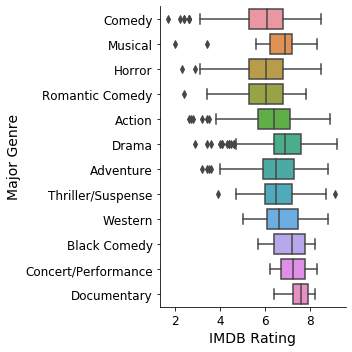

In [51]:
sns.catplot(x="IMDB Rating", y="Major Genre", kind="box", data=movies)

This graph is hard to interpert. It was hard to determine medians between the genres. Concert/Performance films had the least amount of IMDB Votes which makes sense it was the least amount of films in a genre.

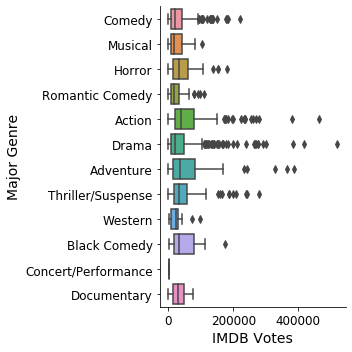

In [52]:
sns.catplot(x="IMDB Votes", y="Major Genre", kind="box", data=movies)

In [53]:
I began to look at Release Date.

SyntaxError: invalid syntax (<ipython-input-53-4e5116dccb1d>, line 1)

In [54]:
movies["Release Date"].value_counts()

11-Oct-02    5
25-Dec-03    5
17-Dec-99    5
15-Dec-06    5
19-Sep-08    4
            ..
1-Dec-07     1
17-May-02    1
28-Jul-00    1
2-Feb-96     1
9-Dec-83     1
Name: Release Date, Length: 893, dtype: int64

In [55]:
movies.sort_values('Release Date')

,Title,US Gross,Worldwide Gross,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,US tickets,Worldwide tickets
2913,Sin City,74103820.0,158753820.0,40000000.0,1-Apr-05,R,126.0,Miramax/Dimension,Based on Comic/Graphic Novel,Action,Fantasy,Robert Rodriguez,77.0,8.3,255814.0,2.964153e+15,6.350153e+15
19,Gigli,6087542.0,7266209.0,54000000.0,1-Aug-03,R,107.0,Sony Pictures,Original Screenplay,Romantic Comedy,Contemporary Fiction,Martin Brest,6.0,2.4,29031.0,3.287273e+14,3.923753e+14
495,The Mummy: Tomb of the Dragon Emperor,102491776.0,397912118.0,175000000.0,1-Aug-08,PG-13,111.0,Universal,Remake,Adventure,Fantasy,Rob Cohen,13.0,5.1,41570.0,1.793606e+16,6.963462e+16
2233,In the Company of Men,2883661.0,2883661.0,25000.0,1-Aug-97,R,107.0,Sony Pictures Classics,Based on Play,Drama,Contemporary Fiction,Neil LaBute,89.0,7.2,7601.0,7.209152e+10,7.209152e+10
269,Air Bud,24646936.0,27555061.0,3000000.0,1-Aug-97,PG,97.0,Walt Disney Pictures,Original Screenplay,Comedy,Kids Fiction,Charles Martin Smith,45.0,4.6,4698.0,7.394081e+13,8.266518e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Holy Man,12069719.0,12069719.0,60000000.0,9-Oct-98,PG,107.0,Walt Disney Pictures,Original Screenplay,Comedy,Contemporary Fiction,Stephen Herek,12.0,4.7,9105.0,7.241831e+14,7.241831e+14
2215,An Unfinished Life,8535575.0,18535575.0,30000000.0,9-Sep-05,PG-13,107.0,Miramax,Original Screenplay,Drama,Contemporary Fiction,Lasse Hallstrom,53.0,7.1,11770.0,2.560672e+14,5.560672e+14
1875,The Exorcism of Emily Rose,75072454.0,144216468.0,18000000.0,9-Sep-05,PG-13,114.0,Sony/Screen Gems,Based on Real Life Events,Thriller/Suspense,Dramatization,Scott Derrickson,45.0,6.8,32425.0,1.351304e+15,2.595896e+15
671,The Man,8330720.0,10393696.0,20000000.0,9-Sep-05,PG-13,107.0,New Line,Original Screenplay,Comedy,Contemporary Fiction,Les Mayfield,11.0,5.4,9356.0,1.666144e+14,2.078739e+14


In [56]:
from datetime import datetime
from pandas import Series, DataFrame

I thought it would be easier to evaluate the data if Release Date was converted to a new variable that was the month of the film's release (Release Date_Month).

In [57]:
movies["Release Date"] = pd.to_datetime(movies["Release Date"])

In [58]:
movies['Release Date'] = pd.to_datetime(movies['Release Date'],format='%Y-%m-%d')

In [59]:
movies['Release Date_Month'] = movies['Release Date'].map(lambda x: x.strftime('%m'))

In [60]:
grouped_movies = movies.groupby('Release Date_Month').size()

In [61]:
grouped_movies.head(12)

Release Date_Month
01     51
02     90
03    109
04    101
05    110
06    134
07    122
08    122
09    113
10    147
11    160
12    196
dtype: int64

Make Release Date and Release Date_Month float variables

In [62]:
movies['Release Date'] = movies['Release Date'].values.astype(float)
movies['Release Date_Month'] = movies['Release Date_Month'].astype(float)

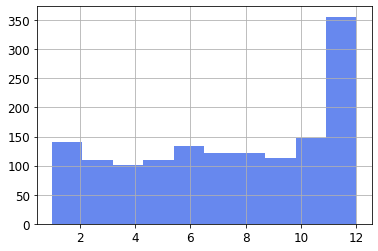

In [63]:
movies["Release Date_Month"].hist()

I took the Release Date_Month and put them into seasons(Release_Season). I wanted to compare the different seasons a film could be realses in.

In [64]:
bin_names = ['Winter', 'Spring', 'Summer', 'Fall']
movies["Release_Season"] = pd.cut(movies["Release Date_Month"],
                               bins=[0,3,6,9, np.inf],
                               labels=bin_names)

In [65]:
movies["Release_Season"].value_counts()

Fall      503
Summer    357
Spring    345
Winter    250
Name: Release_Season, dtype: int64

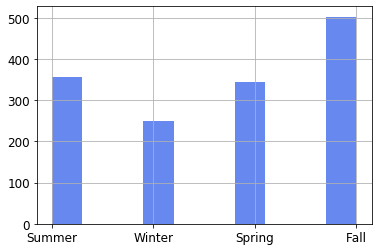

In [66]:
movies["Release_Season"].hist()

# I attempted to compare Major Genre and Release_Season and I got an error 

I release looking back at a graph of Major Genre and Release_Season did not make sense.

# I could figure out how to change Release Date into a useable feature but I was not able to compare release dates to film Genre. Instead to evelated the relationship between Major Genre, Release_Season, and other variables.

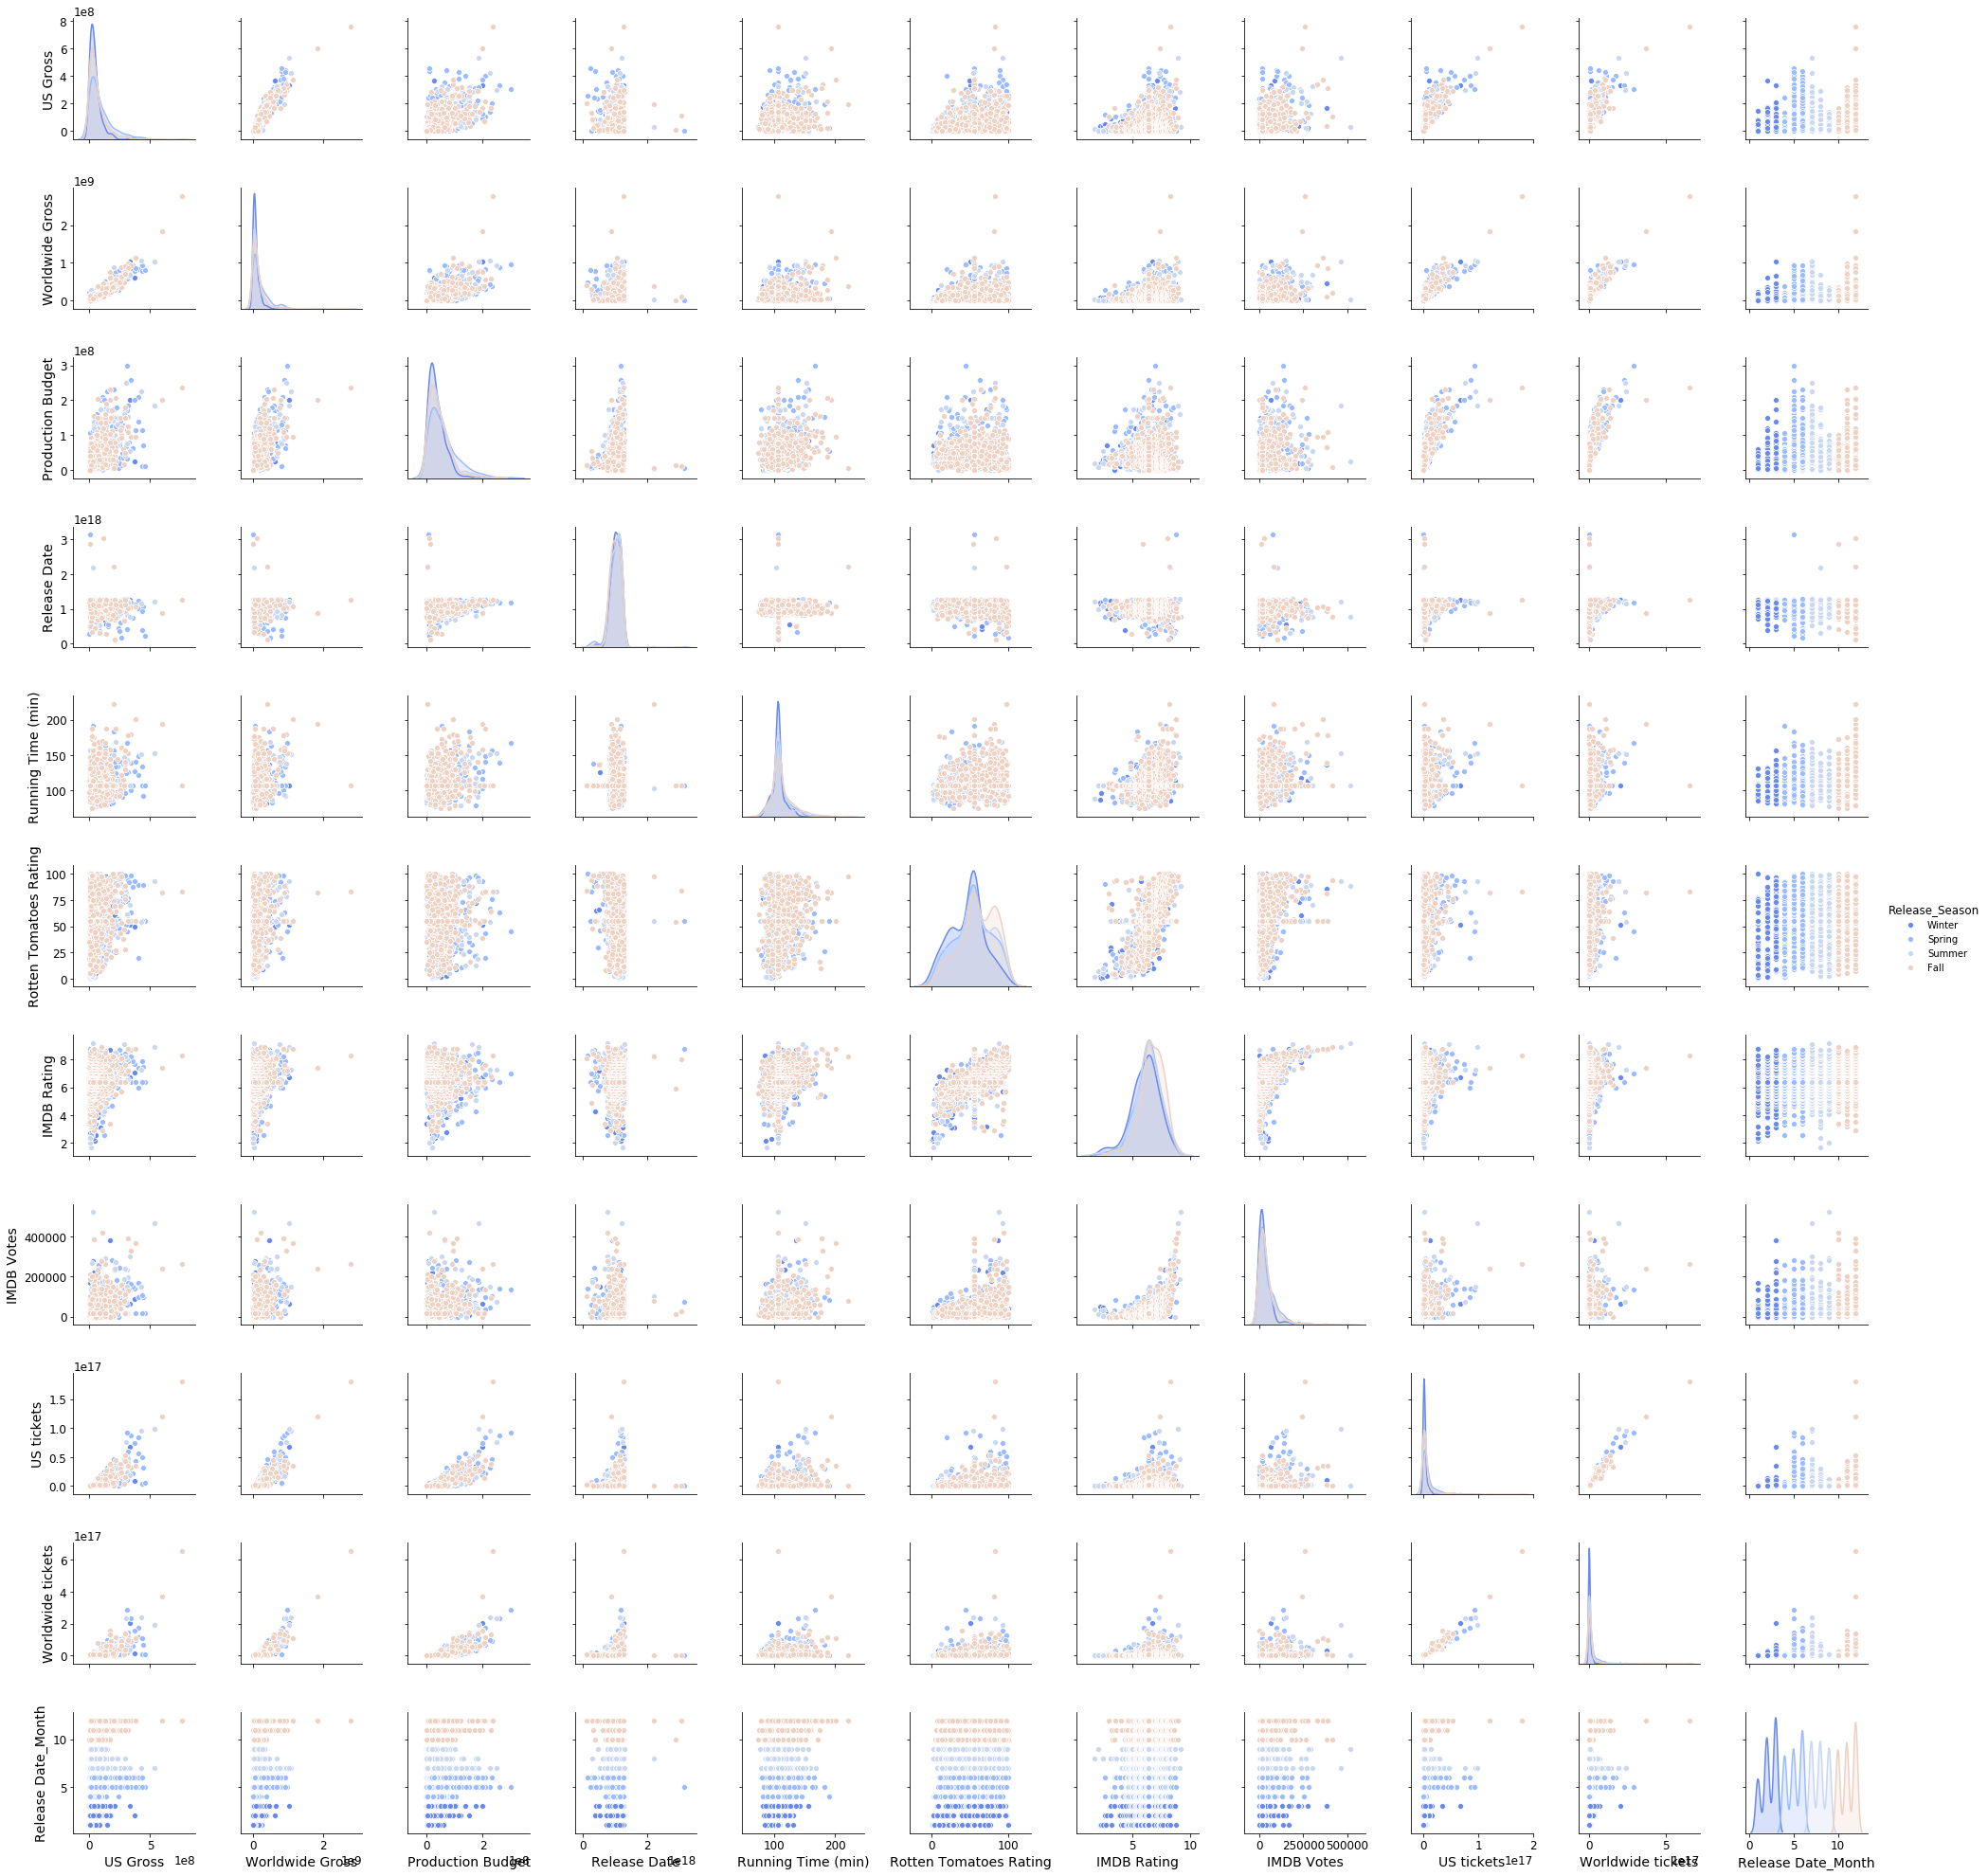

In [67]:
sns.pairplot(movies, hue = 'Release_Season')

For Release Date_Month, there was a weak correlation with Rotten Tomatoes Rating

In [68]:
corr_matrix = movies.corr()
corr_matrix["Release Date_Month"].sort_values(ascending=False)

Release Date_Month        1.000000
Rotten Tomatoes Rating    0.212587
IMDB Rating               0.197543
Running Time (min)        0.165264
IMDB Votes                0.075616
Worldwide Gross           0.043801
Worldwide tickets         0.026531
Production Budget         0.023566
US Gross                  0.019037
US tickets                0.012497
Release Date             -0.002005
Name: Release Date_Month, dtype: float64

I used Release_Season to help visualize the data bettter.

Films relased in the 12th month(December) had the highest median Rotten Tomatoes Rating. Films relased in the 1st month(January) had the lowest median Rotten Tomatoes Rating.

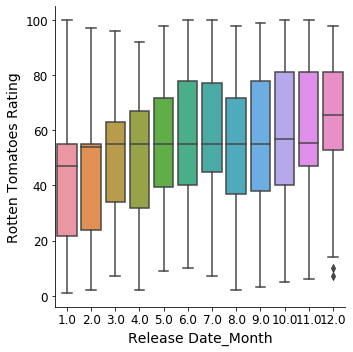

In [69]:
sns.catplot(y="Rotten Tomatoes Rating", x="Release Date_Month", kind="box", data=movies)

Adventure films released in the Spring had the highest WorldWide Gross.

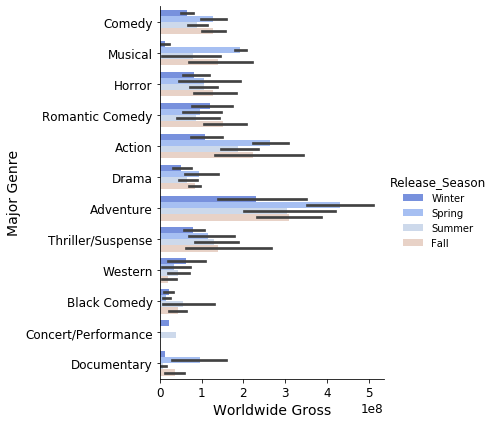

In [70]:
sns.catplot(x="Worldwide Gross", y="Major Genre", hue="Release_Season", data=movies, height=6, kind="bar")

Adventure films released in the Spring had the highest US Gross.

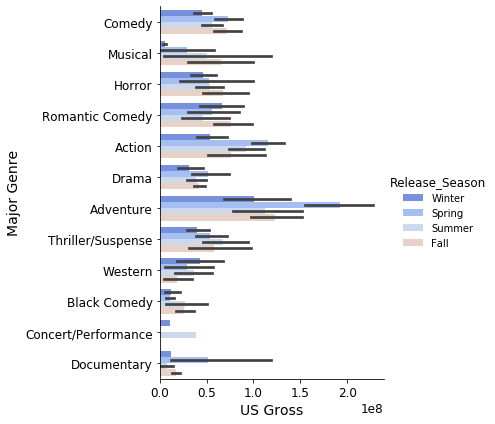

In [71]:
sns.catplot(x="US Gross", y="Major Genre", hue="Release_Season", data=movies, height=6, kind="bar")

# Overall, I believe that producers do strategize release dates for certain kinds of films.


The best time based on US and Worldwide Gross to relase Documentary, Action, and Adventure films is the spring. The best time based on US and Worldwide Gross to relase Musical and Romantic Comedy films is the fall. The best time based on US and Worldwide Gross to relase Concert/Performance films is the summer. The best time based on US and Worldwide Gross to relase Western films is the winter.